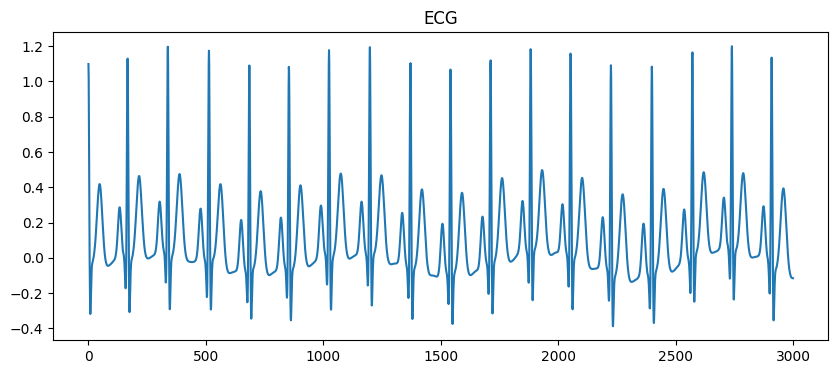

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk


# Generate 15 seconds of ECG signal
ecg = nk.ecg_simulate(duration=15, sampling_rate=200, heart_rate=70)

# np.random.seed(42)
# df = pd.DataFrame({'ts_data': np.random.randn(100).cumsum()})
df = pd.DataFrame({'ts_data': ecg})

plt.figure(figsize=(10, 4))
plt.plot(df['ts_data'])
plt.title('ECG')
plt.show()

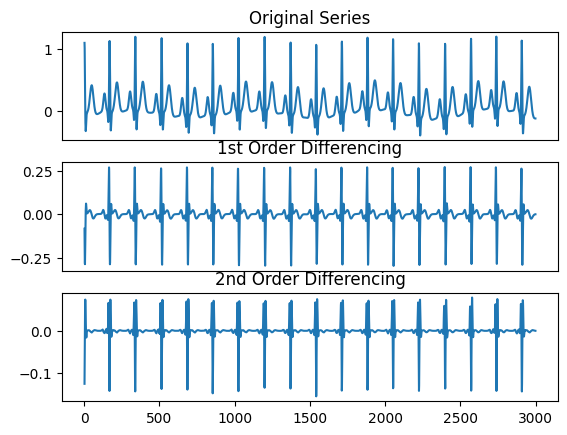

In [12]:
# find parameter p,d,q

# find parameter d by seeing how the time series has become stationary
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df['ts_data'])
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)

# 1st Differencing
ax2.plot(df['ts_data'].diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)

# 2nd Differencing
ax3.plot(df['ts_data'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

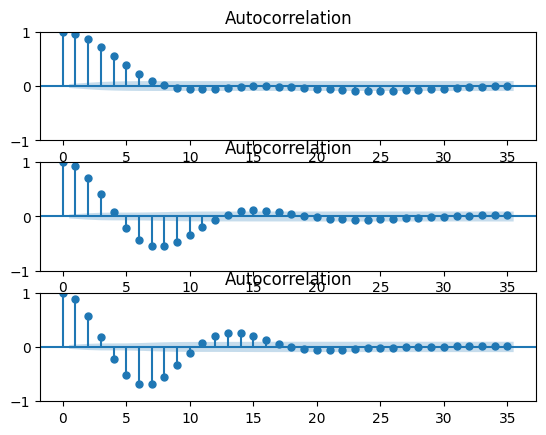

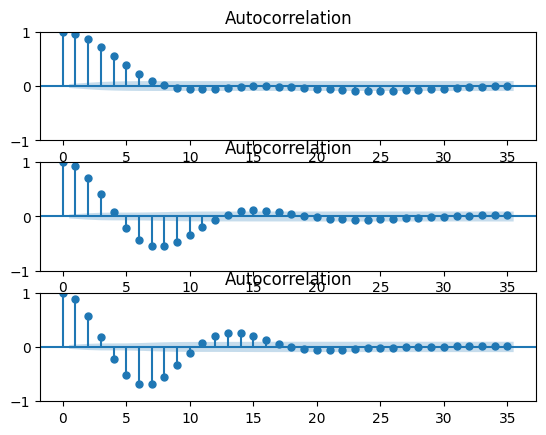

In [13]:
# find parameter d by using an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df['ts_data'], ax=ax1)
plot_acf(df['ts_data'].diff().dropna(), ax=ax2)
plot_acf(df['ts_data'].diff().diff().dropna(), ax=ax3)

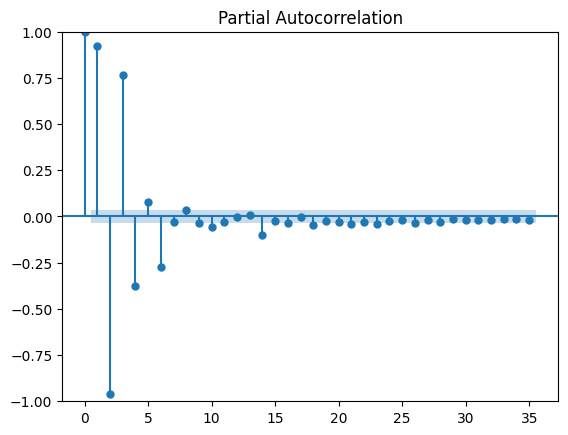

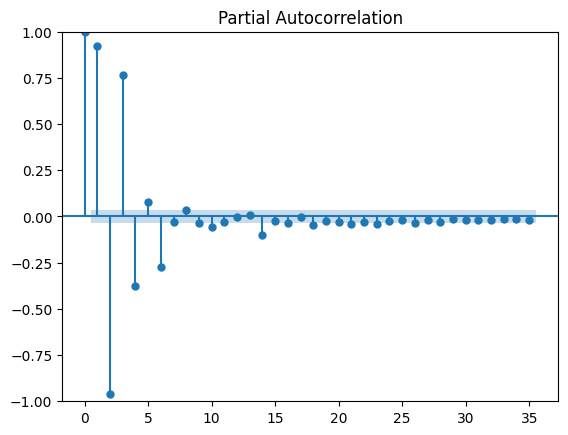

In [14]:
# find p by inspecting the PACF plot
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['ts_data'].diff().dropna())

                               SARIMAX Results                                
Dep. Variable:                ts_data   No. Observations:                 3000
Model:                 ARIMA(7, 0, 7)   Log Likelihood               12940.571
Date:                Mon, 13 May 2024   AIC                         -25849.143
Time:                        09:05:42   BIC                         -25753.041
Sample:                             0   HQIC                        -25814.575
                               - 3000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1067      0.020      5.338      0.000       0.068       0.146
ar.L1          4.1440      0.080     51.505      0.000       3.986       4.302
ar.L2         -7.7088      0.200    -38.572      0.0

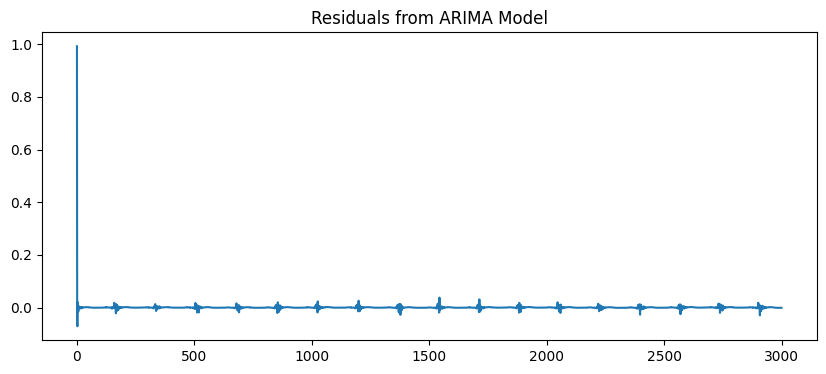

In [15]:
from statsmodels.tsa.arima.model import ARIMA  

# Define the ARIMA model parameters  
p = 7  # Autoregressive order
d = 0  # Differencing order  
q = 7  # Moving average order  
  
# Fit the ARIMA model  
# TODO: check if we should use seasonal
model = ARIMA(df['ts_data'], order=(p, d, q))
# model = ARIMA(df['ts_data'], seasonal_order=(p, d, q, int(200 * 60 /70)))
model_fit = model.fit()

# Print out the summary of the fit
print(model_fit.summary())

# Generate residuals  
df['residuals'] = model_fit.resid

# Plot residuals  
plt.figure(figsize=(10, 4))
plt.plot(df['residuals'])
plt.title('Residuals from ARIMA Model')
plt.show()

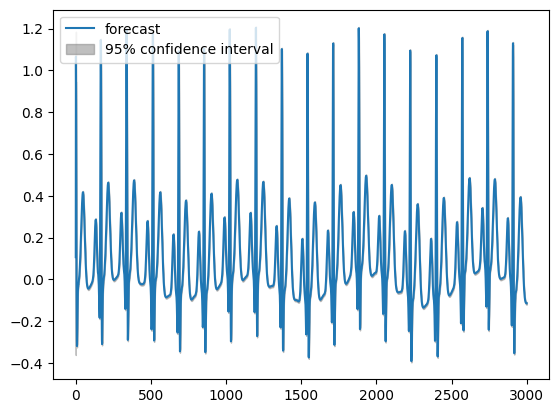

In [16]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(model_fit, dynamic=False)
plt.show()

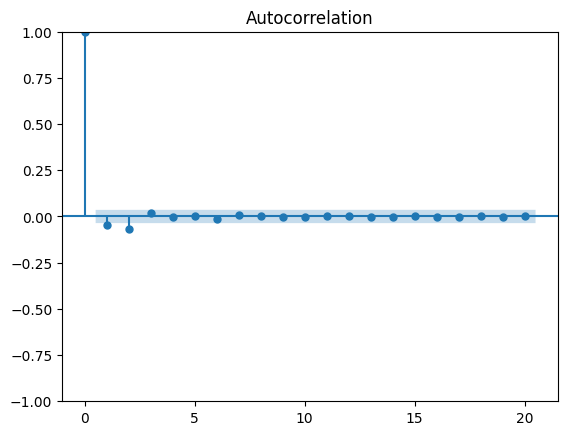

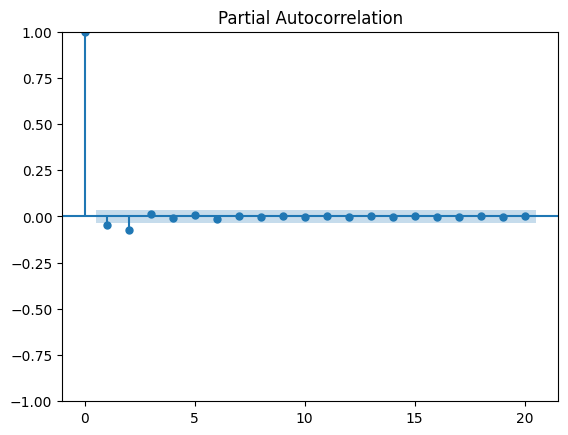

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot ACF and PACF of the residuals  
plot_acf(df['residuals'].dropna(), lags=20)  
plt.show()  
  
plot_pacf(df['residuals'].dropna(), lags=20)  
plt.show()  

# More features can be generated based on these residuals
# For example, standard deviation of residuals
residuals_std = np.std(df['residuals'])